In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from typing import List
import glob

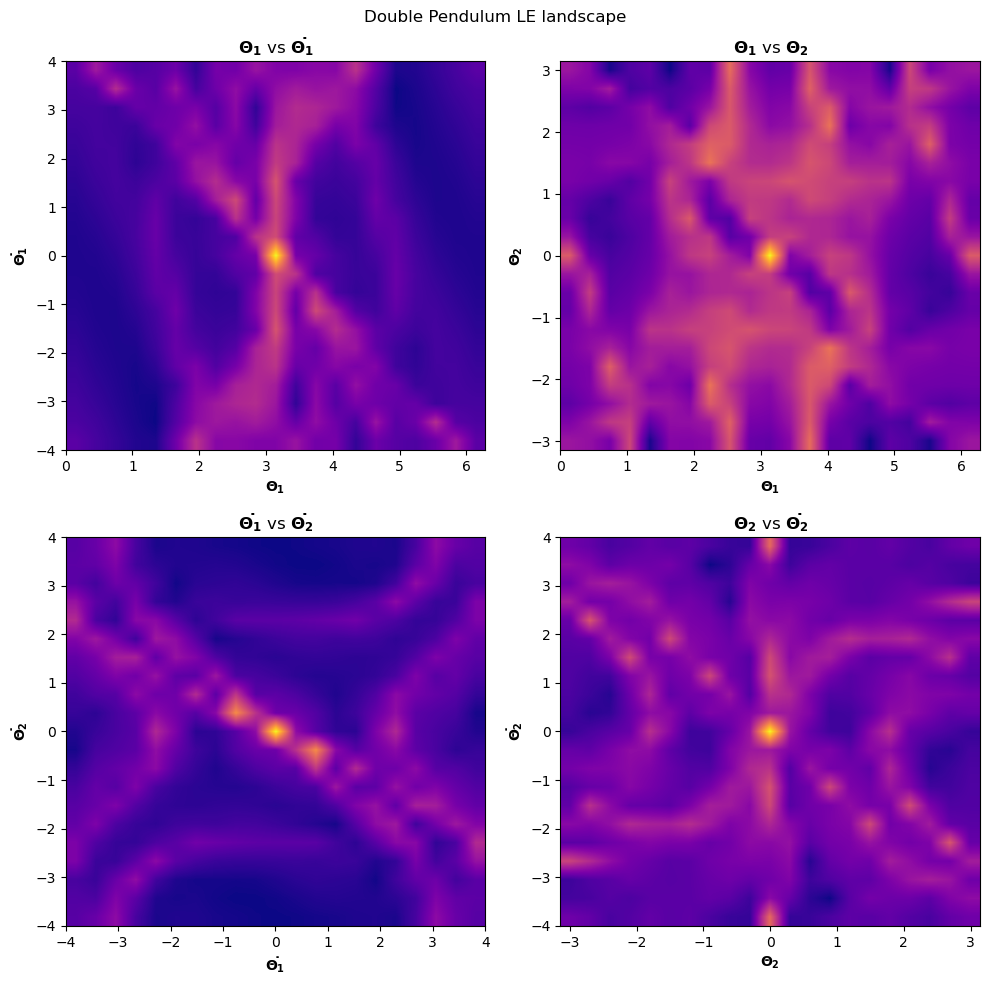

In [4]:
zs1 = np.load('/home/phu/Downloads/precal_dp_20_300_001.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_20_300_001.npy')
tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory.npy")
# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

zs_sum_pos = []
for i in zs1:
    zs_sum_pos.append(sum(i[i>0]))
zs = np.array(zs_sum_pos)
# zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(21, 21, 21, 21)[:,10,:,10]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2+np.pi/2, 3*np.pi/2 + np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0], tjt[2] ,linewidth=3, c='white')
# ax1.scatter(tjt[0][-1],tjt[2][-1], c='blue')
# ax1.scatter(tjt[0][0],tjt[2][0], c='red')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(21, 21, 21, 21)[:,:,10,10]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2+np.pi/2, 3*np.pi/2 + np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax2.plot(tjt[0],tjt[1],linewidth=3, c='white')
# ax2.scatter(tjt[0][-1],tjt[2][-1], c='blue')
# ax2.scatter(tjt[0][0],tjt[2][0], c='red')
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(21, 21, 21, 21)[10,10,:,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax3.plot(tjt[2],tjt[3],linewidth=3, c='white')
# ax3.scatter(tjt[2][-1],tjt[3][-1], c='blue')
# ax3.scatter(tjt[2][0],tjt[3][0], c='red')
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")

ax4 = fig.add_subplot(224)
l4 = zs.reshape(21, 21, 21, 21)[10,:,10,:]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
# ax4.scatter(tjt[1][-1],tjt[3][-1], c='blue')
# ax4.scatter(tjt[1][0],tjt[3][0], c='red')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape')
fig.tight_layout()
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001300.png')

In [48]:
tjt[1]

array([ 0.        ,  1.29213655,  1.92064687,  2.2897216 ,  2.47147172,
        2.60733318,  2.81335297,  3.08641462, -2.94083391, -2.78624094,
       -2.78103878, -2.95138567,  2.99462481,  2.51927452,  1.99084617,
        1.58868988,  1.36303216,  1.18342852,  0.98807072,  0.76258067,
        0.54510284,  0.35656968,  0.26677745,  0.25629026,  0.23452189,
        0.21659997,  0.20171138,  0.18936885,  0.17956321,  0.17225139,
        0.16711775,  0.1638141 ,  0.16198184,  0.1612947 ,  0.16147174,
        0.1622806 ,  0.16353344,  0.16508112,  0.16680651,  0.16861829,
        0.17044628,  0.1722372 ,  0.17395139,  0.17556039,  0.17704481,
        0.17839264,  0.17959791,  0.18065975,  0.18158126,  0.18236855,
        0.18302987,  0.18357504,  0.18401535,  0.18436245,  0.18462808,
        0.18482371,  0.18496003,  0.18504729,  0.18509478,  0.18511074,
        0.18510241,  0.18507611,  0.18503719,  0.18499014,  0.1849385 ,
        0.18488512,  0.18483232,  0.18478168,  0.18473435,  0.18

In [32]:
l1 = zs.reshape(21, 21, 21, 21)[:,10,10,10]

In [33]:
l1

array([2.04740807, 2.28065398, 2.45342579, 2.58605167, 3.02463046,
       3.17560136, 3.66083871, 3.42348172, 3.35598373, 3.49759164,
       6.18990028, 3.49760744, 3.35594249, 3.42348169, 3.6608482 ,
       3.17560008, 3.02462956, 2.58605293, 2.45342377, 2.28065237,
       2.04740617])